<a href="https://colab.research.google.com/github/Steve-YJ/Colab_Exercise/blob/master/Exp01_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# drive mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd drive/My\ Drive/InformationSecurity_Summer
! pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/InformationSecurity_Summer
/content/drive/My Drive/InformationSecurity_Summer


In [3]:
! pwd

/content/drive/My Drive/InformationSecurity_Summer


In [4]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.utils.data

from torch import nn, optim
from torch.nn import functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np

import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image

In [5]:
transforms = transforms.Compose([
                                transforms.Resize((224, 224)),                # Change size of Image to (224, 224)
                                transforms.Grayscale(num_output_channels=1),  # Makes it 1-dimension channel
                                transforms.ToTensor(),                        # Convert a PIL Image or numpy.ndarray to tensor.
                                                                              # Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8
                                                                              # In the other cases, tensors are returned without scaling.
                                # transforms.Normalize(mean=[0.5], std=[0.5]),
                                
                                ])
# trainset = torchvision.datasets.ImageFolder(root="/content/drive/My Drive/Malimg_Exp_200611/malimg",
#                                             transforms = transform)
trainset = torchvision.datasets.ImageFolder(root='./malimg',
                                            transform=transforms)  # make custom dataset

In [6]:
# classes = trainset.classes
classes = trainset.classes
classes

['Adialer.C',
 'Agent.FYI',
 'Allaple.A',
 'Allaple.L',
 'Alueron.gen!J',
 'Autorun.K',
 'C2LOP.P',
 'C2LOP.gen!g',
 'Dialplatform.B',
 'Dontovo.A',
 'Fakerean',
 'Instantaccess',
 'Lolyda.AA1',
 'Lolyda.AA2',
 'Lolyda.AA3',
 'Lolyda.AT',
 'Malex.gen!J',
 'Obfuscator.AD',
 'Rbot!gen',
 'Skintrim.N',
 'Swizzor.gen!E',
 'Swizzor.gen!I',
 'VB.AT',
 'Wintrim.BX',
 'Yuner.A']

In [7]:
full_dataset = trainset
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

In [8]:
train_loader = DataLoader(train_dataset,
                         batch_size=16,
                         shuffle=True,
                         pin_memory=True) 
test_loader = DataLoader(test_dataset,
                        batch_size=16,
                        shuffle=True,
                        pin_memory=True)  # Instead, we recommend using automatic memory pinning (i.e., setting pin_memory=True)
                                          #  which enables fast data transfer to CUDA-enabled GPUs

In [9]:
for idx, (data, _) in enumerate(train_loader):
    print(data[3], data[4], data.type(), data.shape)
    print(_, _.type())
    print("==" * 20 )

tensor([[[0.2706, 0.3961, 0.2902,  ..., 0.0235, 0.0000, 0.0000],
         [0.0588, 0.2510, 0.0039,  ..., 0.1098, 0.0000, 0.0000],
         [0.0118, 0.0431, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.8392, 0.3686, 0.3294,  ..., 0.4824, 0.3725, 0.4431],
         [0.8627, 0.3255, 0.3922,  ..., 0.4078, 0.4549, 0.4863],
         [0.3647, 0.4353, 0.5098,  ..., 0.4000, 0.5490, 0.6118]]]) tensor([[[0.0980, 0.0667, 0.0275,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.1529, 0.1569, 0.1333,  ..., 0.1020, 0.1294, 0.1608],
         ...,
         [0.2118, 0.1608, 0.1216,  ..., 0.2157, 0.1843, 0.1373],
         [0.1490, 0.1176, 0.0784,  ..., 0.1059, 0.0667, 0.0549],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]) torch.FloatTensor torch.Size([16, 1, 224, 224])
tensor([10, 22, 24,  2,  6,  2, 24,  2,  2,  3,  3,  8,  3,  0, 19,  3]) torch.LongTensor
tensor([[[0.1569, 0.2275, 0.3412,  ..., 0.0000, 0.

KeyboardInterrupt: ignored

In [10]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    np_img = img.numpy()

    plt.imshow(np.transpose(np_img, (1, 2, 0)))  # Convert (C, W, H) to (W, H, C)

    print(np_img.shape)  # np_img shape
    print((np.transpose(np_img, (1, 2, 0))).shape)  # transposed shape 

In [11]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(labels)

tensor([ 6,  2, 17,  3, 11, 10, 18, 14,  3,  2,  3, 12,  2,  3,  3, 24])


torch.Size([16, 1, 224, 224])
(3, 906, 906)
(906, 906, 3)
torch.Size([16, 1, 224, 224])
torch.Size([3, 454, 1810])
C2LOP.P Allaple.A Obfuscator.AD Allaple.L Instantaccess Fakerean Rbot!gen Lolyda.AA3 Allaple.L Allaple.A Allaple.L Lolyda.AA1 Allaple.A Allaple.L Allaple.L Yuner.A 


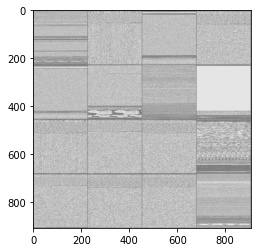

In [12]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(16)))

In [13]:
device = torch.device("cuda")  # device = torch.device("cuda")

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(224*224, 1000)
        self.fc21 = nn.Linear(1000, 100)
        self.fc22 = nn.Linear(1000, 100)
        self.fc3 = nn.Linear(100, 1000)
        self.fc4 = nn.Linear(1000, 224*224)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 224*224))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
print(model)

VAE(
  (fc1): Linear(in_features=50176, out_features=1000, bias=True)
  (fc21): Linear(in_features=1000, out_features=100, bias=True)
  (fc22): Linear(in_features=1000, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=50176, bias=True)
)


In [14]:
# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 224*224), reduction='sum')

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD


def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))


def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(16, 1, 224, 224)[:n]])
                save_image(comparison.cpu(),
                         './results/reconstruction_' + str(epoch) + '.png', nrow=n)

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))


In [15]:
epochs = 10

for epoch in range(1, epochs + 1):
        print(epoch)
        train(epoch)
        test(epoch)
        with torch.no_grad():
            sample = torch.randn(64, 100).to(device)
            sample = model.decode(sample).cpu()
            save_image(sample.view(64, 1, 224, 224),
                       './results/sample_' + str(epoch) + '.png')

1
Train Epoch: 1 [0/7471 (0%)]	Loss: 35144.554688
Train Epoch: 1 [160/7471 (2%)]	Loss: 37112.292969
Train Epoch: 1 [320/7471 (4%)]	Loss: 36045.386719
Train Epoch: 1 [480/7471 (6%)]	Loss: 36299.152344
Train Epoch: 1 [640/7471 (9%)]	Loss: 35308.894531
Train Epoch: 1 [800/7471 (11%)]	Loss: 36019.789062
Train Epoch: 1 [960/7471 (13%)]	Loss: 35335.089844
Train Epoch: 1 [1120/7471 (15%)]	Loss: 35478.378906
Train Epoch: 1 [1280/7471 (17%)]	Loss: 36800.453125
Train Epoch: 1 [1440/7471 (19%)]	Loss: 35627.734375
Train Epoch: 1 [1600/7471 (21%)]	Loss: 35588.335938
Train Epoch: 1 [1760/7471 (24%)]	Loss: 34776.808594
Train Epoch: 1 [1920/7471 (26%)]	Loss: 34689.984375
Train Epoch: 1 [2080/7471 (28%)]	Loss: 33599.160156
Train Epoch: 1 [2240/7471 (30%)]	Loss: 33220.531250
Train Epoch: 1 [2400/7471 (32%)]	Loss: 34695.988281
Train Epoch: 1 [2560/7471 (34%)]	Loss: 34285.089844
Train Epoch: 1 [2720/7471 (36%)]	Loss: 33368.648438
Train Epoch: 1 [2880/7471 (39%)]	Loss: 34473.574219
Train Epoch: 1 [3040/747